<a href="https://colab.research.google.com/github/Gonzales-James/CpE-AIML/blob/main/Multiple%20Linear%20Regression/58034_Lab04_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression


Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [2]:
### YOUR CODE HERE
class MultipleLinearRegression():
  
  def correlations(X, y):
    global corr, corr1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values
    X = a - a.mean()
    X1 = b - b.mean()
    Y = y - y.mean()
    cov = np.mean(X * Y)
    cov1 = np.mean(X1 * Y)
    std_X = np.std(a)
    std_X1 = np.std(b)
    std_y = np.std(y)
    corr = cov / (std_X * std_y)
    corr1 = cov1 / (std_X1 * std_y)
    return print("R = ", corr1, corr) 

  
  # def train(X,y):
  #   global theta
  #   #y = np.array(y).reshape(-1,1)
  #   #X_train = X.T
  #   X_dot = X.T @ X
  #   pseudoinv = np.linalg.inv(X_dot)
  #   y_dot = X.T @ y
  #   theta = pseudoinv @ y_dot
  #   return theta

  def train(X,y):
    global w0, w1
    y = y.values
    a = X.iloc[::,0].values
    b = X.iloc[::,1].values

    SD_x = np.std(a)
    SD_x1 = np.std(b)
    SD_y = np.std(y)

    r = np.corrcoef(a, y)[0,1]
    r1 = np.corrcoef(b, y)[0,1]

    w1 = r * (SD_y/SD_x)
    w1_1 = r1 * (SD_y/SD_x1)

    w0 = y.mean() - w1 * a.mean()
    w2 = y.mean() - w1_1 * b.mean()
    return print("w0: ", w0, "\nw1: ", w1, "\nw2: ", w2)

  def predict(X):
    global pred
    a = X.iloc[::,0].values
    pred = w0 + w1 * a
    index = np.array(list(range(0, pred.size)))
    return print("y_hat = ", pred, ", i = ", index)

  def evaluate(): # note: y_hat = predicted value; y = orig value; y_bar = y mean
    SSE = np.sum(np.square(pred - y[0:5]))
    SST = np.sum(np.square(y - y.mean()))
    MSE = np.mean(np.square(pred - y[0:5]))
    r2 = 1 - (SSE/SST)
    n = y.size 
    k = 1
    df = {'SST' : SST,
         'SSR' : np.sum(np.square(pred - y.mean())),
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : np.sqrt(MSE),
         'R-squared' : r2,
         'Adjusted R-squared' : 1 - ((1 - r2)*(n - 1)/(n-k-1))}
    return df
  
  def visualize(X_test, y_test):
    a = X_test.iloc[::,0].values
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(a, y_test)
    plt.plot(a, pred, color='red')
    return plt.show()
  
  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [3]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [4]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression

In [5]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X, y)
R

R =  0.09301407775270563 0.86298272670127


Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [6]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train, y_train)
#regressor.model_

w0:  97706.91683160246 
w1:  228.80069224806263 
w2:  -3483566.2271210123


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}227.70\\ 2916.78 \\ -5772267.02\end{bmatrix}$$

In [7]:
  ## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

y_hat =  [223501.53742959 335073.90699743 441994.75849187 246036.1176091
 259077.75706724] , i =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [8]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': 0.8262230365142222,
 'MSE': 20221484552.267723,
 'R-squared': 0.827978359377715,
 'RMSE': 142202.26634012457,
 'SSE': 101107422761.33862,
 'SSR': 32216351588.103653,
 'SST': 587759902740.0532}

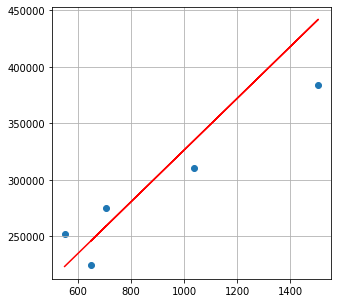

In [9]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)